<a href="https://colab.research.google.com/github/svmanohar/monte-carlo-stocks/blob/main/Monte%20Carlo%20Stock%20Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# New Section

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [71]:
import yfinance as yf
AMZN=yf.Ticker("LMT")
hist = AMZN.history(period="max")
hist = hist.loc[(hist.index >='2022-01-01') & (hist.index <='2022-12-31')]
# hist = hist.loc[(hist.index >='2022-01-01')

In [72]:
# Define Steve's starting capital to invest
starting_capital = 10000

In [73]:
# amazon_df['Date'] = amazon_df['Date'].astype('datetime64')

In [74]:
#convert to prices to returns
hist['log_returns'] = np.log(hist['Close'])
hist['log_returns']

Date
2022-01-03 00:00:00-05:00    5.838117
2022-01-04 00:00:00-05:00    5.859420
2022-01-05 00:00:00-05:00    5.848728
2022-01-06 00:00:00-05:00    5.848337
2022-01-07 00:00:00-05:00    5.854297
                               ...   
2022-12-23 00:00:00-05:00    6.174341
2022-12-27 00:00:00-05:00    6.178903
2022-12-28 00:00:00-05:00    6.174196
2022-12-29 00:00:00-05:00    6.182090
2022-12-30 00:00:00-05:00    6.180940
Name: log_returns, Length: 251, dtype: float64

<ipython-input-75-da80177aba3d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hist['log_returns'])


Text(0, 0.5, 'Frequency')

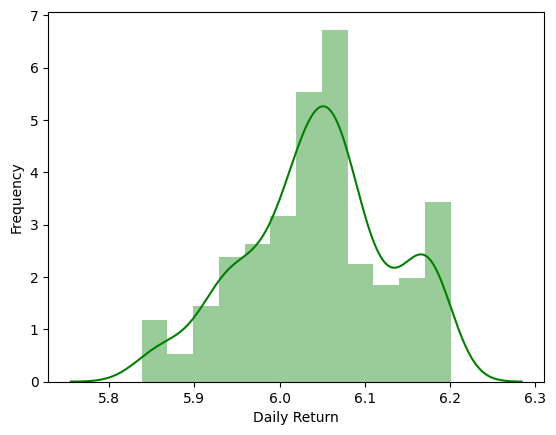

In [75]:
#plotting distribution of returns
sns.distplot(hist['log_returns'])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [76]:
# amazon_df['log_returns'] = np.log(amazon_df['Adj Close'])
# amazon_df['log_returns']

In [77]:
# Calculate drift and volatility
drift = np.mean(hist['log_returns'])
volatility = np.std(hist['log_returns'])

In [78]:
drift

6.0447350559323745

In [79]:
volatility

0.0836031133867146

# IN USE

In [80]:
stock_price = hist['Close'].iloc[-1] # initial stock price
# stock_price = 127.82

In [81]:
print(stock_price)

483.4461975097656


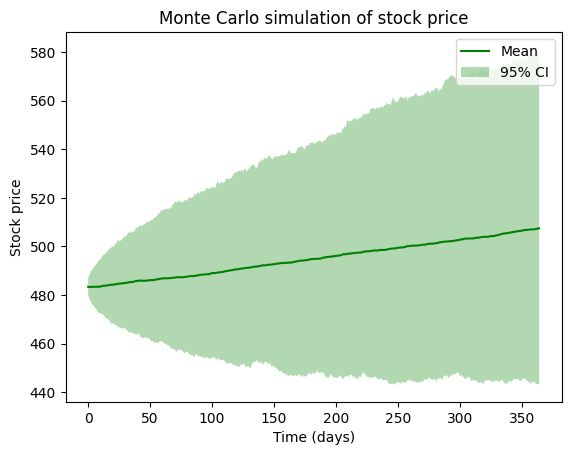

The mean price is [483.40087703 483.274829   483.3657971  483.35905727 483.36022869
 483.40017929 483.41822643 483.46550311 483.36869604 483.45943542
 483.55469981 483.6203412  483.82442592 483.78999376 483.82766834
 483.92015273 483.99902444 484.13462923 484.24635903 484.17897666
 484.29864298 484.32345959 484.37846648 484.52598253 484.58715644
 484.71094058 484.77694587 484.74258878 484.85560877 484.93830124
 484.94739107 484.9988772  485.15554241 485.25437151 485.36815291
 485.39307047 485.39163871 485.52712295 485.72024705 485.76242365
 485.8381312  485.9733605  485.9513     485.92171625 485.91271318
 485.87796639 485.92581858 485.94885718 485.9715992  486.06975022
 486.10281484 486.19144358 486.13668161 486.20819435 486.30290714
 486.40051661 486.48005216 486.59907547 486.68769009 486.79060522
 486.8724588  486.8744414  486.84517666 486.83984517 486.9135397
 486.96595584 486.95811374 487.01141139 487.11177029 487.12240215
 487.21108836 487.32685634 487.34857236 487.36602197 487.28

In [82]:
# Define the simulation parameters
# stock_price = 127.82
number_simulations = 1000 # number of simulations
interest_rate = 0.05 # risk-free interest rate, instead of using drift
# see "risk-neutral assumption"
time_period = 365/365 # time period in years

# Define the GBM model
def simulate_stock_price(stock_price, interest_rate, volatility, time_period):
    dt = 1/365 # time step, so price for one day
    n_steps = int(time_period/dt) # number of time steps
    t = np.linspace(0, time_period, n_steps+1) # time vector
    dW = np.random.normal(size=n_steps) # random numbers for Brownian motion

    # note we can swap in drift for interest_rate here if we think there is substantial drift
    dX = (interest_rate - 0.5*volatility**2)*dt + volatility*dW*np.sqrt(dt) # random numbers for GBM
    log_price = np.log(stock_price) + np.cumsum(dX) # simulate the logarithm of the stock price
    price = np.exp(log_price) # convert back to the stock price
    return price

# Run the simulation
simulation_results = np.zeros((number_simulations, int(time_period*365)))
for i in range(number_simulations):
    simulation_results[i,:] = simulate_stock_price(stock_price, interest_rate, volatility, time_period)

# Analyze the results
mean_price = np.mean(simulation_results, axis=0)
std_price = np.std(simulation_results, axis=0)
percentile_5 = np.percentile(simulation_results, 5, axis=0)
percentile_95 = np.percentile(simulation_results, 95, axis=0)

# Visualize the results
plt.figure()
plt.plot(mean_price, label='Mean')
plt.fill_between(range(int(time_period*365)), percentile_5, percentile_95, alpha=0.3, label='95% CI')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Stock price')
plt.title('Monte Carlo simulation of stock price')
plt.show()

# print results
print(f'The mean price is {mean_price}')
print(f'The stdev is {std_price}')


In [83]:
len(simulation_results)

1000

In [84]:
len(mean_price)
mean_price[-1]

507.48271634647836

In [85]:
owned_shares = starting_capital/stock_price
profit = owned_shares * (mean_price[-1] - mean_price[0])

(profit/starting_capital) * 100

4.981286322995342

<ipython-input-86-ed8274168456>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([sim_returns])


Text(0, 0.5, 'Frequency')

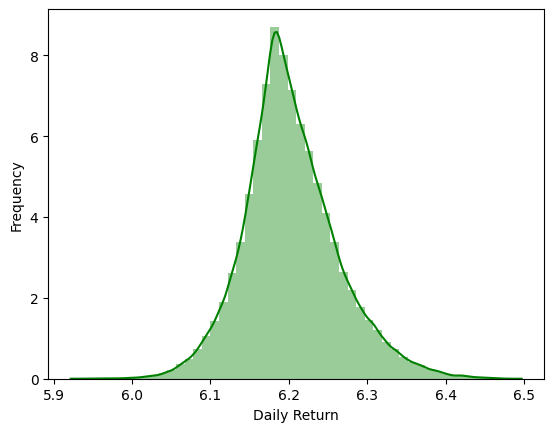

In [86]:
#plotting simulated returns
sim_returns = np.log(simulation_results)

sns.distplot([sim_returns])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<ipython-input-87-26fab35b47aa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([sim_returns])


Text(0, 0.5, 'Frequency')

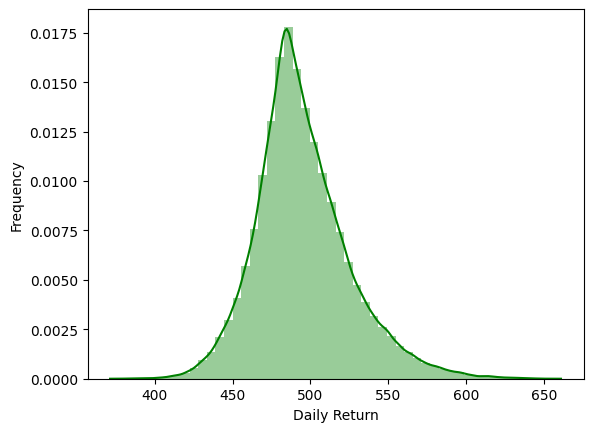

In [87]:
#plotting simulated returns, raw
sim_returns = simulation_results

sns.distplot([sim_returns])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [88]:
# Get average value of stock price on 365th day
end_price = []
for sim in simulation_results:
  end_price.append(sim[-1])

np.mean(end_price)

507.4827163464783

In [89]:
len(simulation_results)

1000

In [90]:
simulation_results[0]

array([483.67679796, 486.54469995, 486.72217857, 489.0915223 ,
       487.88088747, 489.29279368, 489.67542944, 486.93024109,
       485.68799397, 485.98531095, 487.16113323, 485.77539323,
       486.78739823, 487.48085423, 486.77078969, 488.34285127,
       485.338733  , 484.82984003, 484.39109865, 484.16567106,
       480.81202964, 481.73964224, 478.07256419, 477.67343175,
       473.89783626, 475.31656507, 475.21714508, 476.81796562,
       478.49826897, 480.09587475, 481.47781123, 485.28461183,
       486.22864671, 489.98972773, 487.87655594, 486.94504534,
       487.79380209, 489.65609387, 492.07798323, 491.80803106,
       493.20346815, 491.07407977, 494.24839319, 497.77517871,
       500.92444316, 499.67117455, 501.54701203, 499.87383194,
       503.20640856, 504.91411051, 505.930229  , 506.06760954,
       506.41949288, 501.55465577, 497.67872043, 495.64817917,
       496.24810856, 498.78669293, 500.00792643, 501.02906341,
       500.19703968, 502.40124975, 505.27574661, 503.69

In [91]:
average_price = [np.mean(price) for price in simulation_results]

In [92]:
len(simulation_results)

1000

Text(0, 0.5, 'Frequency')

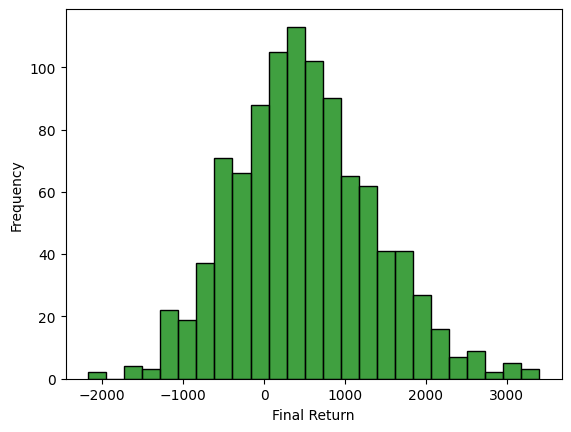

In [93]:
#plotting simulated returns, raw
sell_price = []
owned_shares = starting_capital / stock_price
for simulation in simulation_results:
  sell_price.append({'Dollar Return':(simulation[-1] - stock_price)*owned_shares,
                     'Percent Return':((simulation[-1]/stock_price)-1)})


df_sell_price = pd.DataFrame(sell_price)
sns.histplot(df_sell_price['Dollar Return'])
plt.xlabel("Final Return")
plt.ylabel("Frequency")

# Evaluating options via chance of profit/loss

In [94]:
chance_of_profit = len(df_sell_price[df_sell_price['Percent Return'] > 0])/1000
chance_of_profit
chance_of_loss = 1-chance_of_profit

In [95]:
chance_of_profit

0.712

Text(0, 0.5, 'Frequency')

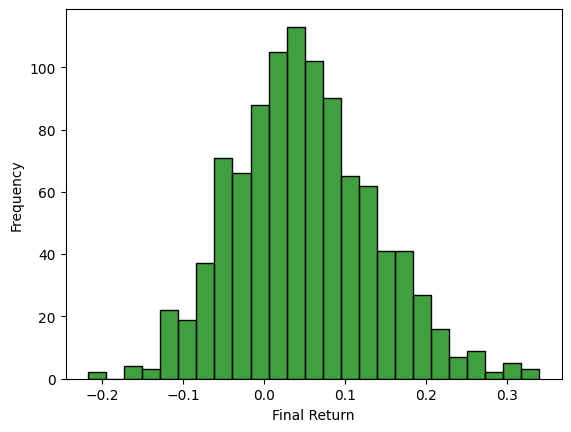

In [96]:
#custom_palette = sns.set_palette(sns.color_palette(["#7F0000"])) # red
custom_palette = sns.set_palette(sns.color_palette(["#008000"])) # green
sns.histplot(df_sell_price['Percent Return'])
plt.xlabel("Final Return")
plt.ylabel("Frequency")


In [97]:
np.mean(df_sell_price['Dollar Return'])

497.1911861242255

   Desired Return  Probability
0            0.05        0.471
1            0.10        0.266
2            0.15        0.131
3            0.20        0.053
4            0.25        0.019
5            0.30        0.006
6            0.35        0.000
7            0.40        0.000
8            0.45        0.000
9            0.50        0.000


<Axes: xlabel='Desired Return', ylabel='Probability'>

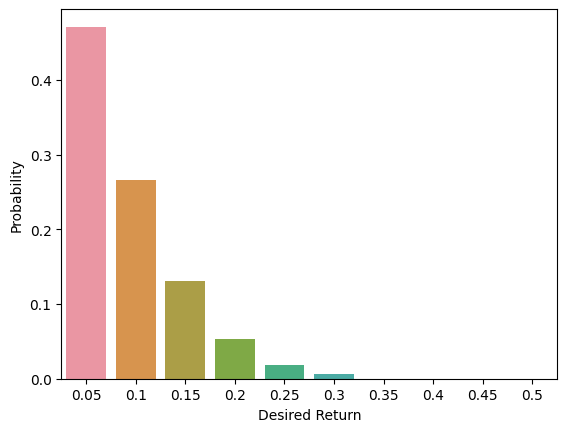

In [98]:
desired_returns = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]  # desired return percentages

starting_price = stock_price

# Plot the percentage change of making the above percent returns
results = []
for i in desired_returns:
  chance_of_profit = len(df_sell_price[df_sell_price['Percent Return'] > i])/1000
    #count = sum(price >= final_price for price in simulation_results)
  results.append({'Desired Return': i, 'Probability': chance_of_profit})

df = pd.DataFrame(results)
print(df)
sns.barplot(x='Desired Return', y='Probability', data=df)


# Let's review Steve's options:

He has $10,000 and initially wants to invest it in Amazon. Let's assume he can't buy partial shares. 

The remainder of his money that isn't used to buy stocks will sit in a savings account, earning an interest of 1%.

1. We have the starting price in 2019 and the ending price in 2019. Can we assess how close to reality the average simulated ending price was?

2. Next, can we pass in a new starting price for 2022 and see what we could expect in 2023?

3. Then let's see how many shares Steve can buy, and how many dollars he can actually expect to receive if he **sells one year later.**

4. Let's compare this to how much we would make if he bought a stock that tracked the S&P500 (Ticker: `'VOO'`)

5. We can stop here OR we can diversify his portfolio in a 25% split - $2,500 for four stocks